## Machine Learning Models

More Machine Learning Models : https://www.youtube.com/playlist?list=PLAwxTw4SYaPkQXg8TkVdIvYv4HfLG7SiH

### Linear Regressions

Refer to this url : https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a

In [153]:
import pandas as pd

df_train = pd.read_csv('datasets_1256_2242_train.csv')
df_test = pd.read_csv('datasets_1256_2242_test.csv')

In [158]:
import numpy as np
df_train.dropna(inplace=True)
df_test.dropna(inplace = True)
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [159]:
print(x_train.shape)
df_train.info()

(699,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [160]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [161]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(r2_score(y_test,y_pred))

0.9888014444327563


In [163]:
## Linear Regression 
import numpy as np

n = 699
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

epochs = 0
while(epochs < 1000):
    y = a_0 + a_1 * x_train
    error = y - y_train
    mean_sq_er = np.sum(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n 
    a_1 = a_1 - alpha * 2 * np.sum(error * x_train)/n
    epochs += 1
    if(epochs%10 == 0):
        print(mean_sq_er)

1.3942356296511217e+54
3.2291316301445906e+107
7.478858568124144e+160
1.7321475829555947e+214
4.011755566453295e+267
inf


C:\Users\risha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\risha\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


inf
inf
inf
inf
inf
nan


C:\Users\risha\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
print(y_test[0])
print(y_pred[1])

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
plt.scatter(range(len(y_test)),y_test,color='red',label='GT')
plt.plot(range(len(y_test)),y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

### SVM

Refer to this : https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [2]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])
print(df)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.1           3.5            1.4           0.2      Iris-setosa
1             4.9           3.0            1.4           0.2      Iris-setosa
2             4.7           3.2            1.3           0.2      Iris-setosa
3             4.6           3.1            1.5           0.2      Iris-setosa
4             5.0           3.6            1.4           0.2      Iris-setosa
..            ...           ...            ...           ...              ...
95            5.7           3.0            4.2           1.2  Iris-versicolor
96            5.7           2.9            4.2           1.3  Iris-versicolor
97            6.2           2.9            4.3           1.3  Iris-versicolor
98            5.1           2.5            3.0           1.1  Iris-versicolor
99            5.7           2.8            4.1           1.3  Iris-versicolor

[100 rows x 5 columns]


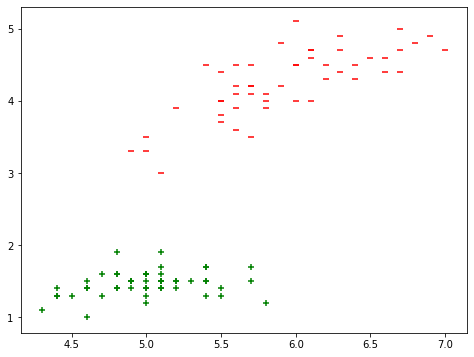

In [3]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [4]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [5]:
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
print(y_train.shape)
print(x_train.shape)
y_train = y_train.reshape(90,1)
print(x_train[:,0].shape)
print(y_train.shape)

(90,)
(90, 2)
(90,)
(90, 1)


In [184]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


C:\Users\risha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
# Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train 
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

In [195]:
index = list(range(10,90))

w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

In [196]:
w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

In [197]:
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

In [198]:
test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

In [199]:
y_pred = w1 * test_f1 + w2 * test_f2

In [200]:

predictions = []
for val in y_pred:
    if(val >= 1):
        predictions.append(1)
    else:
        predictions.append(0)

In [201]:

print(predictions)

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]


In [202]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

1.0


### Decision Tree

Refer to this :https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('housing1.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,880
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,7099
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,1467
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1274
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,1627


In [172]:
feature_cols = ['total_rooms','housing_median_age' ]
X = data.iloc[:,[2,5]].values
y = data.iloc[:,10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [173]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [174]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [175]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [176]:
#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.0007751937984496124
